# **Prediction using Unsupervised ML : Task 2**

## **Aim : To predict the optimum number of clusters and represent it visually.**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# **Dataset Loading :**

In [ ]:
# Load the Iris Dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)


# **Dataset First View :**

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Dataset Rows & Columns count :**

In [ ]:
df.shape

(150, 4)

# **Dataset Information :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# **Duplicate Values :**

In [ ]:
df.duplicated().sum()

1

In [ ]:
# Remove the duplicated rows:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# **Missing Values/Null Values :**

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# **Dataset's statistical properties :**

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


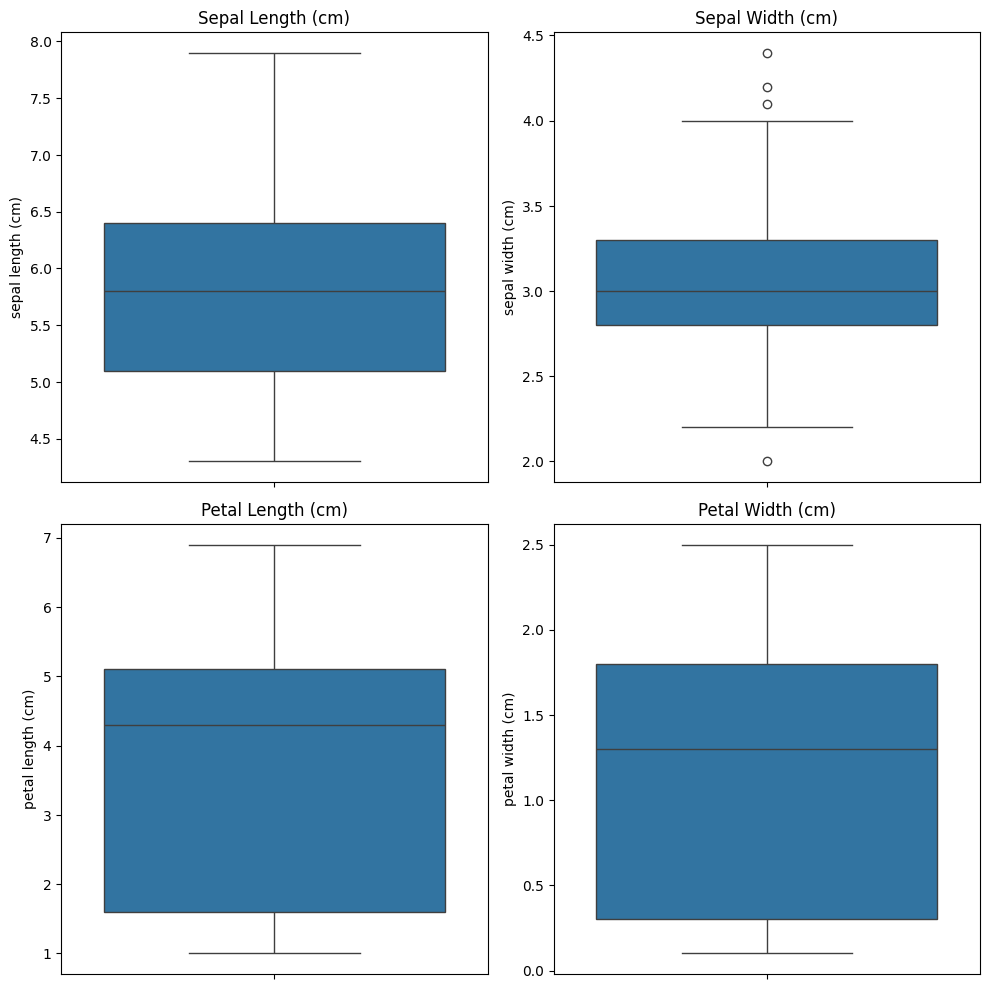

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.boxplot(df['sepal length (cm)'])
plt.title('Sepal Length (cm)')

plt.subplot(2, 2, 2)
sns.boxplot(df['sepal width (cm)'])
plt.title('Sepal Width (cm)')

plt.subplot(2, 2, 3)
sns.boxplot(df['petal length (cm)'])
plt.title('Petal Length (cm)')

plt.subplot(2, 2, 4)
sns.boxplot(df['petal width (cm)'])
plt.title('Petal Width (cm)')

plt.tight_layout()
plt.show()


# **Understanding the Correlation Matrix :**

<Axes: >

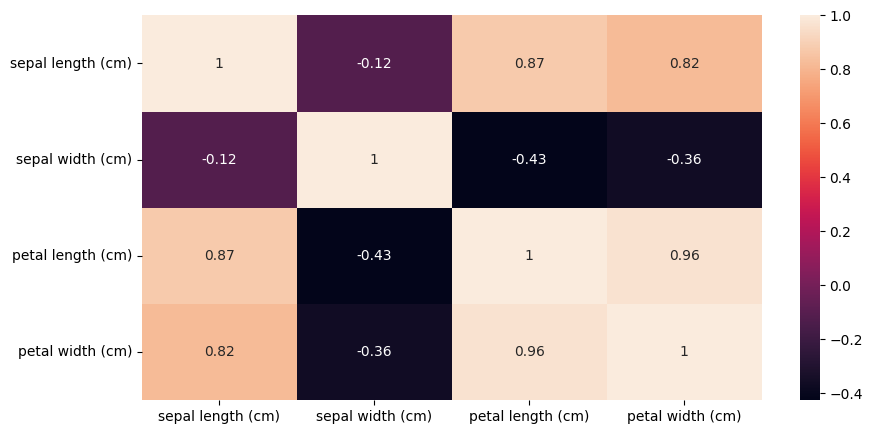

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

- The heatmap reveals that petal length and petal width have a very strong positive correlation, while sepal length also shows strong positive correlations with both petal length and petal width, and sepal width exhibits moderate negative correlations with both petal length and petal width.

# **Finding the optimal K value :**

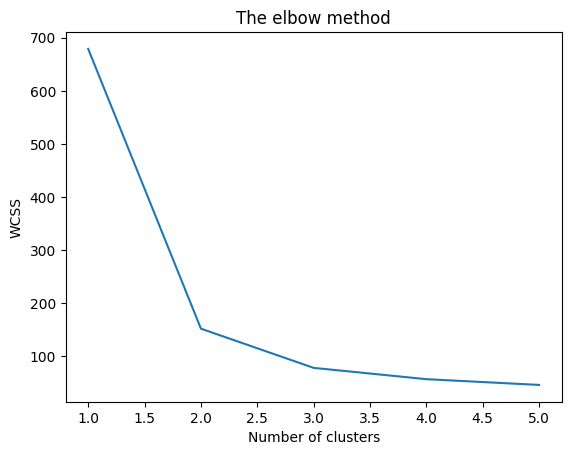

In [ ]:
# Finding the optimum numbre of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 6):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

#plotting the result onto line graph,
plt.plot(range(1, 6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [ ]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore warnings
warnings.filterwarnings("ignore")

range_n_clusters = [3, 4, 5]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=3, the silhouette score is 0.5552928210895678
For n_clusters=4, the silhouette score is 0.49876443223551353
For n_clusters=5, the silhouette score is 0.49093568527383924


- Conclusion :
The silhouette scores suggest that clustering with 3 clusters yields the highest separation between clusters (0.555), while clustering with 4 and 5 clusters shows slightly lower but still reasonable separation (0.499 and 0.491, respectively).

# **Building the model with 3 clusters :**

In [ ]:
# applying kmeans to the dataset / creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

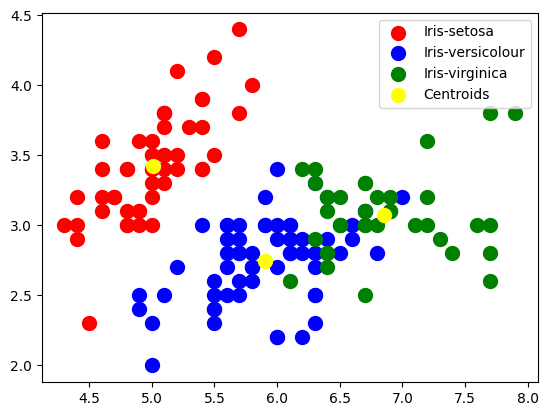

In [ ]:
# Visualising the clusters - on the first teo columns
x = df.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

The clustering results are visualized in the graph above. All three clusters, along with their centroids, are shown and labeled. Thus, our task has been successfully executed.

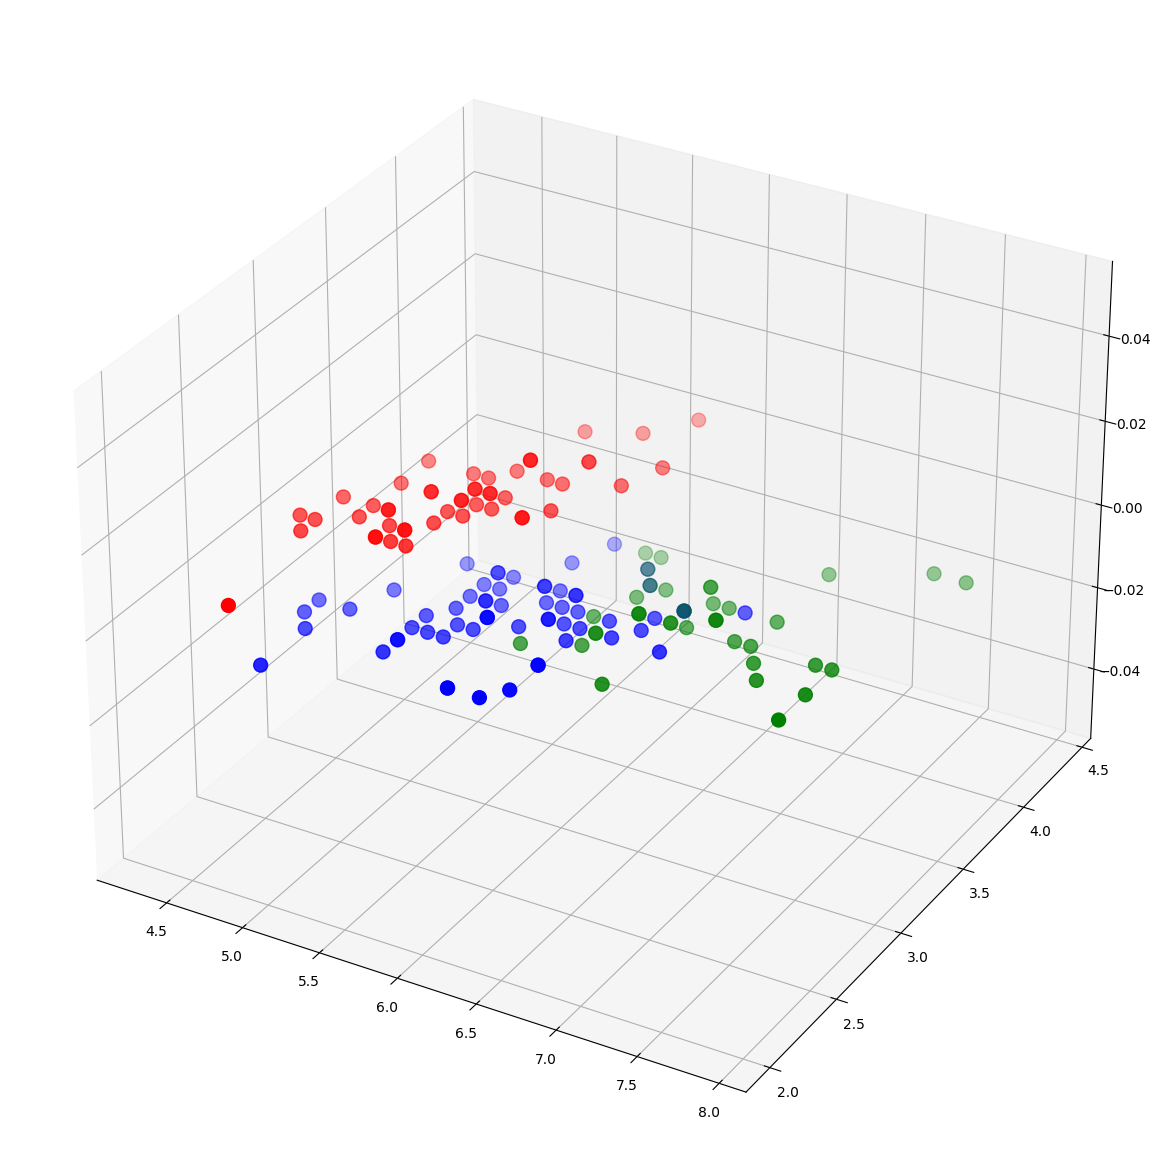

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
